In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [51]:
# ? stun isimlerini girdik daha anlamlı gözükmesi için aks i halde sadece sayılardan oluşan bir tablo olacaktı 
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
#data frame yi okuduk 
df = pd.read_csv("magic04.data", names=cols)
df.head() #ilk 5 satırı yazdırıyoruz işlem doğru mu diye 

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [52]:
df["class"].unique()
#g gama için , h hadron için kullanılıyor ama makine onları anlaması için 0 ve 1 e çevireceğiz  

#! değer eğer g(gama) ise onu int e çevirecek
df["class"]=(df["class"] == "g").astype(int)

In [53]:
df.head() #dk 31 de kaldık 

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


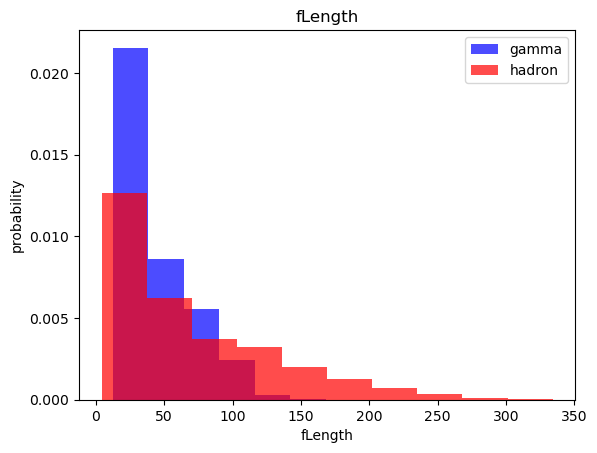

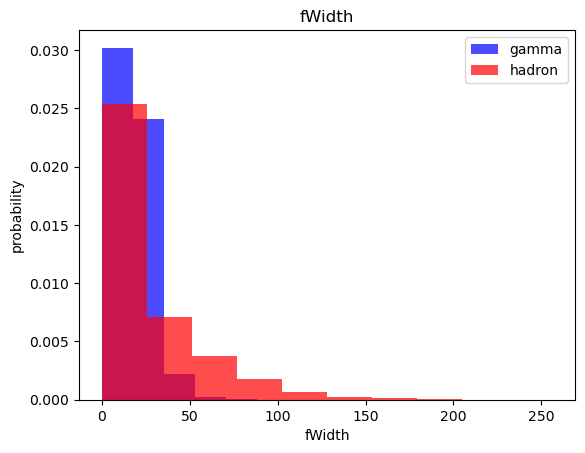

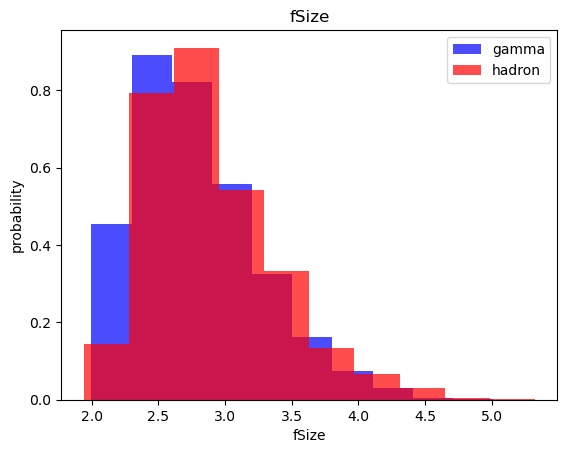

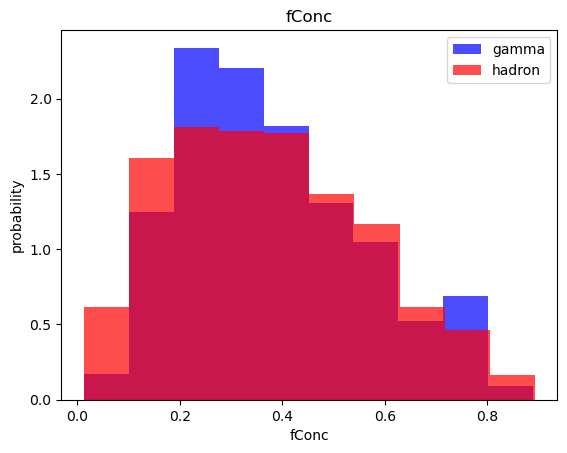

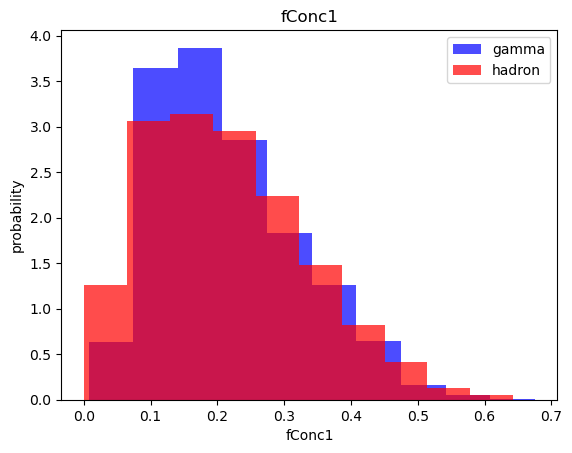

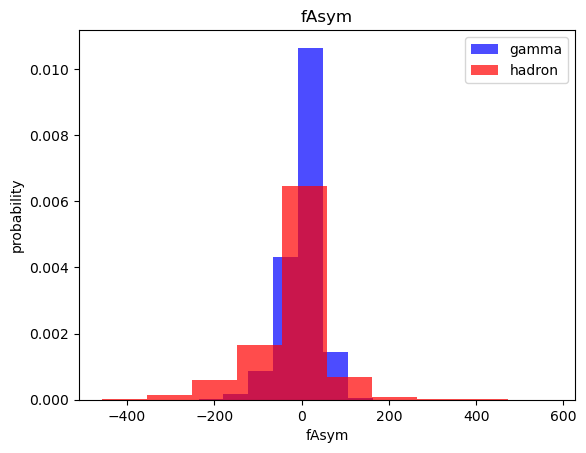

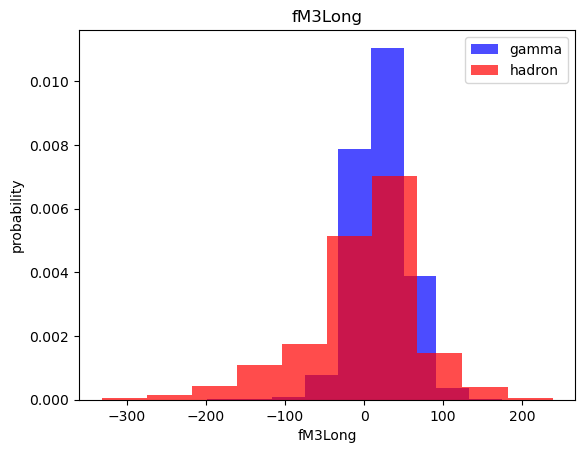

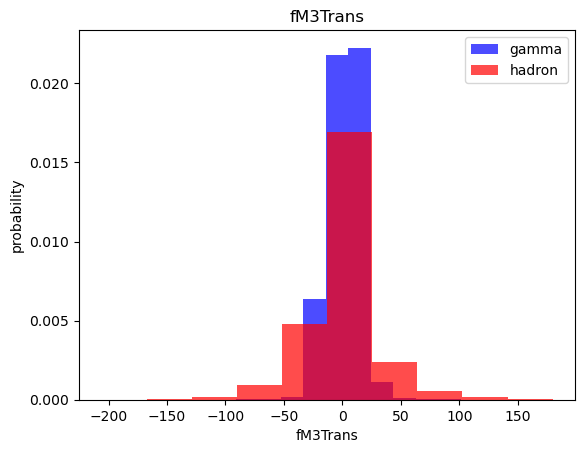

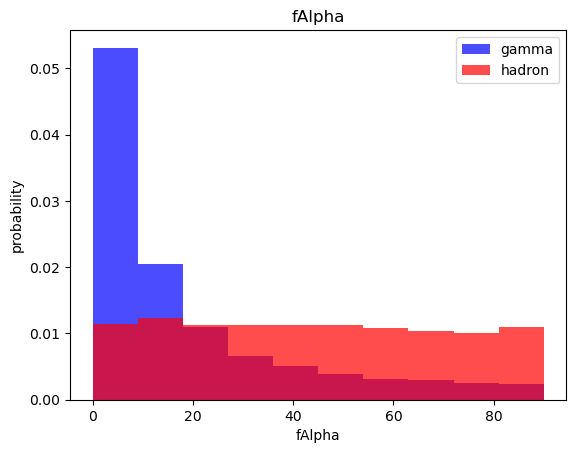

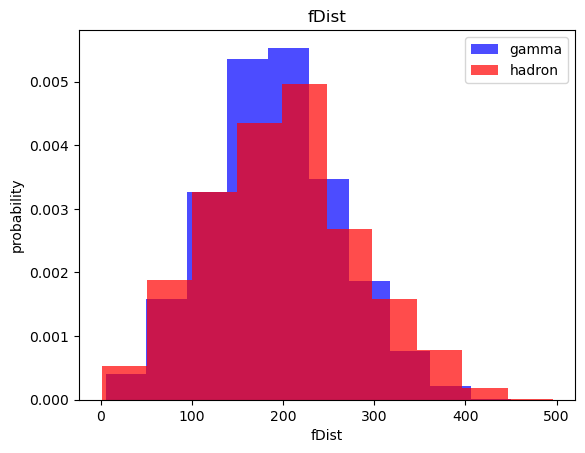

In [54]:
for label in cols[:-1]:# tüm değerleri çizer 
 plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
 plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
 plt.title(label)
 plt.ylabel("probability")
 plt.xlabel(label)
 plt.legend()
 plt.show()


## Train ,validation ,test dataset olarak ayıracağız 

In [55]:

# veri setimizi bölüyoruz 3 parçaya ayırıyoruz ve bunları değerlere atıyoruz train valid ve test olmak üzere 3 parça 
# ilk %60 train olacak  sonra 60 ile 80 arası vaid 80 100 arası da test datası olacak 
train ,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

c:\Users\canoz\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Bazı verilerin değerleri çok az yada çok fazla olabiliyor bunları elden geçirmeli ve normalize etmemiz gerekli 

In [56]:
def scale_dataset_örnek( dataframe):
    X=dataframe[dataframe.columns[:-1]].values #baştan sona kadar stunlar 
    Y=dataframe[dataframe.columns[-1]].values #en sondaki class stunu 


    scaler=StandardScaler()
    X=scaler.fit_transform(X) #xleri dönüştürecek 

    # data=np.hstack((X,Y))         # X VE Y STUNLARINI YANYANA BİRLEŞTİRECEK AYNI BAŞTA OLDUĞU GİBİ TEK TABLO GİBİ OLACAK TEKRARDAN 

    #numpy boyutlar konusunda çok titizdir x 2 boyutlu bir dizi y tek boyutlu bir dizi şeklinde 
    #y yi 2 boyutluya çevirmek gerek , eşit boyutlu olsalardı #!  data=np.hstack((X,Y))   #? yeterli olurdu

    data=np.hstack((X,np.reshape(Y,(-1,1))))

    return data,X,Y

In [57]:
train

print(len(train[train["class"]==1]))#gama veri sayısı
print(len(train[train["class"]==0]))#hadron veri sayısı

7378
4034


##### hadron  veri sayısı gama ya göre daha az bu da hatalı sonuç çıkarabilir verileri biraz arttırmak gerekiyor
##### from imblearn.over_sampling import RandomOverSampler         i include ettik 


In [58]:
#üstteki  scale dataset fonksiyonunu yeniden güncel halini yazmalıyız az olana uydurma da yapacak şekilde 

def scale_dataset( dataframe,oversample=False):
    X=dataframe[dataframe.columns[:-1]].values 
    Y=dataframe[dataframe.columns[-1]].values 


    scaler=StandardScaler()
    X=scaler.fit_transform(X) #xleri dönüştürecek 


    if oversample: # az olan veriyi çok olan veri boyutuna kadar eşit  olacak şekilde  sayısını arttıracak 
        ros=RandomOverSampler()
        X,Y=ros.fit_resample(X,Y)



    data=np.hstack((X,np.reshape(Y,(-1,1))))

    return data,X,Y


In [59]:
_train , _x_train , _y_train = scale_dataset(train , oversample=True) #dönüş değerlerine göre değişkenlere atadık 


In [60]:
print(len(_y_train)) #? toplam veri sayısı 

print(sum((_y_train==1))) # ?  1 olan veri sayısı
print(sum((_y_train==0))) # ?  0 olan veri sayısı

# veri sayısını 7363 de eşitlemiş 

14756
7378
7378


##### valide ve test için oversample yi false yaptık çünkü aşırı örneklem olmadan nasıl bir sonuç veriyor onu inceleyeceğiz 
##### ! veri seti hakkında bir bilgimiz yokmuş gibi dengede olup olmadığını umursamıyoruz şimdilik bakalım ne kadar önemliymiş

In [61]:
# todo : eğer burayı tek çalıştırırken hata alıyorsak fonksiyonu bloğunu çalıştırdıktan sonra burayı çalıştırmalıyız

train , x_train , y_train = scale_dataset(train , oversample=True) 
valid , x_valid , y_valid = scale_dataset(valid , oversample=False) 
test , x_test , y_test = scale_dataset(test , oversample=False)
#valide ve test için oversample yi false yaptık çünkü aşırı örneklem olmadan nasıl bir sonuç veriyor onu inceleyeceğiz 
# ! veri seti hakkında bir bilgimiz yokmuş gibi dengede olup olmadığını umursamıyoruz şimdilik bakalım ne kadar öenmliymiş


### K - NEAREST NEİGHBORD METHODU DK46


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report #sınıflandırma raporu için


In [63]:
# parametreler
# komşu sayısı, 
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [64]:
y_pred=knn_model.predict(x_test)

In [65]:
print(y_pred)
print(y_test)
# ? 6 değerden 5 i doğru çıktı 

[0 1 1 ... 0 1 0]
[1 0 1 ... 1 0 1]


Sınıflandırma raporu için import edelim classification_repot u 

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1315
           1       0.83      0.89      0.86      2489

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804



In [67]:
# accuracy 0.81 ---->>> % 81  doğruluk oranı
# 
#  precision  hassasiyet puanı doğru olanlar yanlış yanlış olanlar da doğru olarak etiketlenmiş olabilir    # ! PRECİSİONRECAL.PNG
# 0.77 GERÇEKTEN 0(GAMMA) ,0.83 GERÇEKTEN 1(HADRON) SINIFINA AİTMİŞ
# 
# f1-score  accuracy ve precision un genel bir performans değerlendirmesi 





Neighbord değerini 1 den değiştirirsek ne olur bakalım: örnek olarak arttıtıp fscore  sonuçlara bakalım  ve performans nasıl değişecek inceleyelim

In [68]:

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_predd=knn_model.predict(x_test)
print(classification_report(y_test,y_predd))
# performans pbir fonksiyon şekinde bazı değerlerde performanslı bazılarında ise daha düşüke performanslı oluyor optimal değer bulunmalı gibi 


              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1315
           1       0.86      0.87      0.86      2489

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#### Naive BAYES
#### MAP : Maximum A Posteriori 1.08.0 DK 

####! DOĞRULUK OLASILIĞINI EN FAZLA YAPMAK İÇİN EN OLASI K NIN BULUNMASI GEREKİR .
bias kuralından yola çıkarak Map.png



In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49      1315
           1       0.74      0.89      0.80      2489

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [71]:
#bu sistemle daha az başarılı değerler aldık 

# LOGİSTİİC REGRESSİON 1.19.10.DK

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lg_model= LogisticRegression()
lg_model= lg_model.fit(x_train, y_train)

In [74]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1315
           1       0.84      0.81      0.83      2489

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [75]:
!# ! naive bias yönteminden daha iyi ama hala knn den daha başarısız bir f1_score ye sahip

'#' is not recognized as an internal or external command,
operable program or batch file.


### SVM (support vector machines)


In [76]:
from sklearn.svm import SVC

In [77]:
svm_model= SVC()
svm_model= svm_model.fit(x_train,y_train)

In [78]:
y_pred= svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1315
           1       0.89      0.90      0.89      2489

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [79]:
# fi skorumuz 87 oldu şu ana kadardaki en iyi olan skor

In [80]:
#SİNİR AĞI KULLANARAK BU SKORU GEÇEBİLİRMİYİZ?

# Neural Network

##### with TensorFlow

In [81]:
import tensorflow as tf

In [82]:
# daha komplex yapılar oluşturmak için fonksiyon olarak tanımladık  

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history


# basit bir sinir ağ katman yapısı hali 
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),  # 32 unitlik bir katman
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid')  # Çıktı katmanı, sigmoid aktivasyon fonksiyonuyla
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])  # 'accuracy' doğru yazıldı







c:\Users\canoz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

16 nodes, dropout 0, lr 0.01, batch size 32


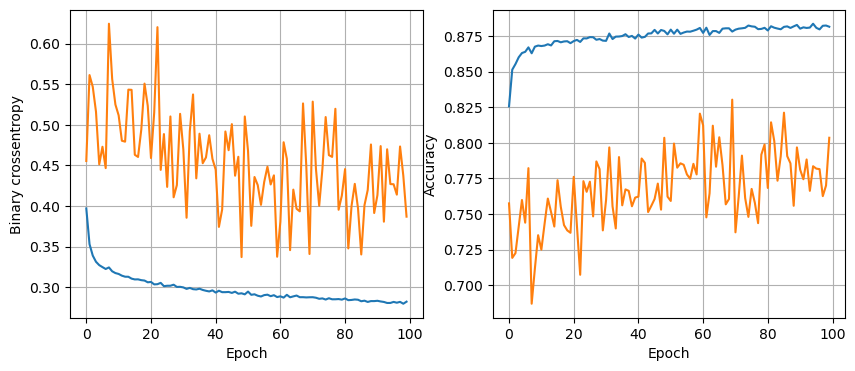

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3387
16 nodes, dropout 0, lr 0.01, batch size 64


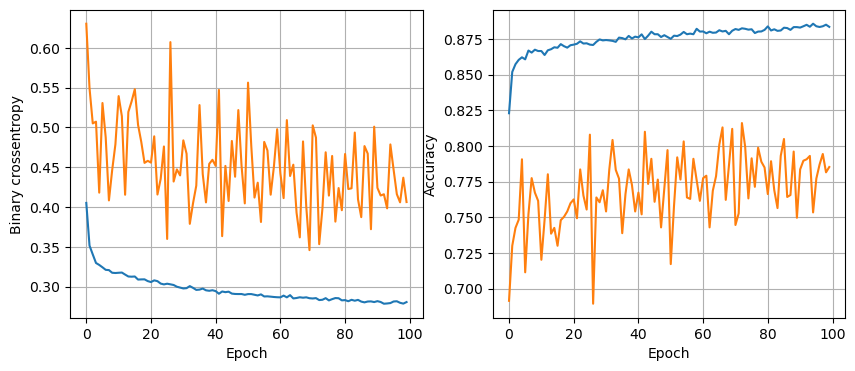

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3370
16 nodes, dropout 0, lr 0.01, batch size 128


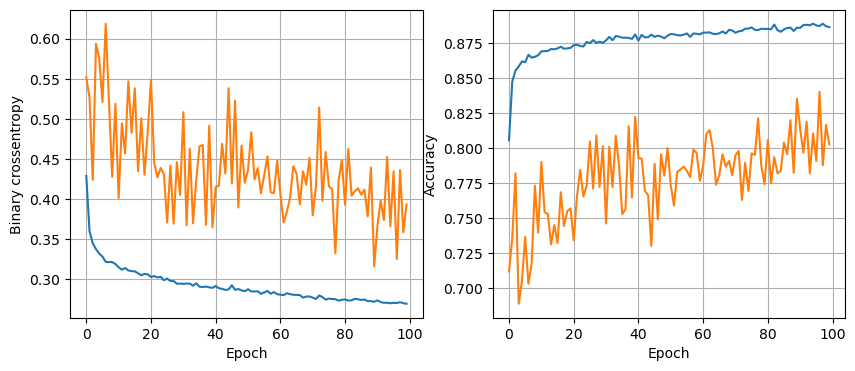

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.3348
16 nodes, dropout 0, lr 0.005, batch size 32


KeyboardInterrupt: 

In [85]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [86]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1315
           1       0.89      0.90      0.90      2489

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



### LİNEER REGRESSİON 2.10.1DK